In [33]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

df = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


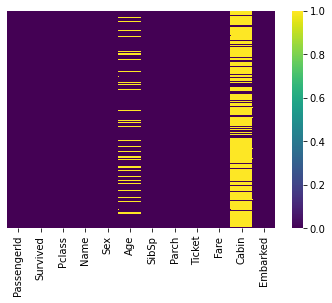

In [35]:
sns.heatmap(df.isnull(),yticklabels= False,cmap='viridis')

In [36]:
def new_age(c):
    Age = c[0]
    Pclass = c[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [37]:
df['Age'] = df[['Age', "Pclass"]].apply(new_age, axis= 1)

In [38]:
test['Age'] = test[['Age', "Pclass"]].apply(new_age, axis= 1)

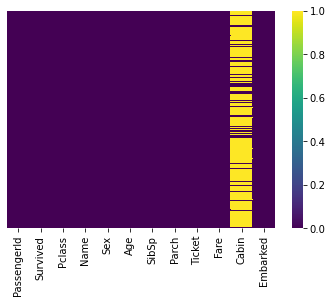

In [39]:
sns.heatmap(df.isnull(),yticklabels= False,cmap='viridis')

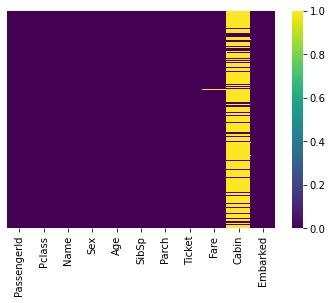

In [40]:
sns.heatmap(test.isnull(),yticklabels= False,cmap='viridis')

In [54]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Fare"]
X = pd.get_dummies(df[features])
y = df["Survived"]

In [55]:
X_test = pd.get_dummies(test[features])

del X_test["Sex_female"]

In [56]:
X

,Pclass,SibSp,Parch,Age,Fare,Sex_female,Sex_male
0,3,1,0,22.0,7.2500,0,1
1,1,1,0,38.0,71.2833,1,0
2,3,0,0,26.0,7.9250,1,0
3,1,1,0,35.0,53.1000,1,0
4,3,0,0,35.0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,0,0,27.0,13.0000,0,1
887,1,0,0,19.0,30.0000,1,0
888,3,1,2,24.0,23.4500,1,0
889,1,0,0,26.0,30.0000,0,1


del X['Sex_female']

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators = 10, max_depth= 4,  random_state = 0).fit(X, y)

pred = clf.predict(X_test)
output = pd.DataFrame({"PassengerId": test.PassengerId, 'Survived': pred})
output.to_csv('my_sub.csv', index =False)
print("Done")


Done


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 0)


In [58]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0, solver = "lbfgs").fit(X_train, y_train)
y_preds = clf.predict(X_test)
print ("accuracy: {:.3f}".format(accuracy_score(y_test, y_preds)))

accuracy: 0.794


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train,y_train)
y_pre = clf.predict(X_test)
print ("accuracy: {:.3f}".format(accuracy_score(y_test, y_pre)))

accuracy: 0.794


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

reg = RandomForestClassifier(n_estimators = 10, max_depth= 4,  random_state = 0).fit(X_train, y_train)

y_pred = reg.predict(X_test)

print ("accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))


accuracy: 0.807


In [61]:
def a():    
    from sklearn.svm import SVC

    # Your code here
    clf = SVC(gamma = 0.1, C = 10).fit (X_train, y_train)
    y_pre = clf.predict(X_test)
    return accuracy_score(y_test, y_pre)
a()

0.7354260089686099

In [62]:
def b():
    from sklearn.tree import DecisionTreeClassifier
    

    # Your code here
    tree_clf= DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
    df = pd.DataFrame({"feature": X_train.columns, "feature_importances": tree_clf.feature_importances_})
    a = df.sort_values(["feature_importances"], ascending=0).head(6)
    return a
b()

,feature,feature_importances
6,Sex_male,0.315322
3,Age,0.259771
4,Fare,0.236417
0,Pclass,0.089356
1,SibSp,0.072984
2,Parch,0.026151


In [ ]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve

    # Your code here
    i = np.logspace(-4,1,6) 
    train_scores, test_scores = validation_curve(SVC(random_state=0), X, y, param_name = "gamma", param_range= i)
    
    return np.array(list(map(np.mean, train_scores))), np.array(list(map(np.mean,test_scores))) # Your answer here
answer_six()

In [ ]:
def answer_six():
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import validation_curve

    # Your code here
    i = np.arange(2,10,1) 
    train_scores, test_scores = validation_curve(RandomForestClassifier(random_state=0), X, y, param_name = "max_depth", param_range= i)
    
    return np.array(list(map(np.mean, train_scores))), np.array(list(map(np.mean,test_scores))) # Your answer here
answer_six()

In [ ]:
    import matplotlib.pyplot as plt
    train_scores, test_scores = answer_six()
    plt.figure()
    plt.plot(np.arange(2,10,1),train_scores, "b", label = "training scores")
    plt.plot(np.arange(2,10,1),test_scores, "r", label = "test scores")
    plt.xlabel("log")
    plt.ylabel("scores")
    plt.legend()
    plt.show()